# Colour map assessment

In [20]:
using ColorSchemes
using EchogramColorSchemes
using Colors
using Plots
using StatsBase

## Lightness profile

We compute the Lightness $L^*$ of a colour by converting to Lab space:

In [11]:
l(ai::Color) = convert(Lab, ai).l;

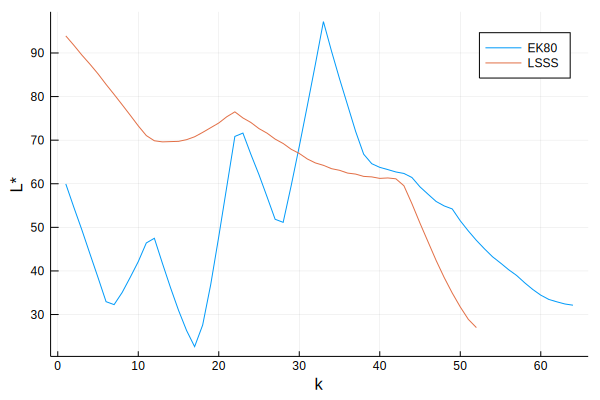

In [12]:
plot([l(x) for x in EchogramColorSchemes.EK80.colors], label="EK80", xlabel="k", ylabel="L*")
plot!([l(x) for x in EchogramColorSchemes.LSSS.colors], label="LSSS")

## Test whether a colour map is sequential

We measure whether a colour scheme is sequential, using Spearman's Rank of the lightness profile ($r_s$):

In [21]:
index(itr::AbstractVector) = 1:length(itr)

function lspearman(colorscheme::ColorScheme)
    d = l.(colorscheme.colors)
    corspearman(d, index(d))
end

lspearman (generic function with 1 method)

In [24]:
lspearman(EK80), lspearman(LSSS), lspearman(ColorSchemes.viridis)

(0.015613553113553114, -0.9380175872961667, 1.0)

## Test whether a colour map is perceptually uniform

We measure whether a colour scheme is perceptually uniform using the Pearson correlation coefficient of CIEDE2000 colour distance ($\rho$):

In [25]:
function labpearson(colorscheme::ColorScheme)
    d = colordiff.(colorscheme.colors[1],colorscheme.colors)
    cor(d, index(d))
end

labpearson (generic function with 1 method)

In [26]:
labpearson(EK80), labpearson(LSSS), labpearson(ColorSchemes.viridis)

(0.27998693278020237, 0.9469260456200085, 0.9911584660715735)

## Test whether a colour map is colourful

Finally we test the colourfulness of a colour map, by using it to paint our sample echogram and measuring the colorfulness of the resulting image ($\hat{M}^{(3)}$) according to Hasler & Süsstrunk (2003).

In [36]:
using Images
using ImageQualityIndexes

#using Pkg
#
#Pkg.add(PackageSpec(url="https://github.com/EchoJulia/SimradEK60.jl.git"))
#Pkg.add(PackageSpec(url="https://github.com/EchoJulia/SimradEK60TestData.jl.git"))
#Pkg.add(PackageSpec(url="https://github.com/EchoJulia/EchogramImages.jl.git"))

using SimradEK60
using SimradEK60TestData
using EchogramImages

In [33]:
function colourfulness(cmap)
    ps =collect(pings(EK60_SAMPLE));
    ps = [p for p in ps if p.frequency == 120000];
    Sv120 = Sv(ps);
    x = 340
    d = 1500

    Sv120 = Sv120[1:d,x:end]
    img = imagesc(Sv120, vmin=-95, vmax=-50, cmap = cmap)
    img = RGB.(img)
    trunc(Int,ImageQualityIndexes.colorfulness(img))
end


colourfulness (generic function with 1 method)

In [35]:
colourfulness(EK80), colourfulness(LSSS), colourfulness(ColorSchemes.viridis)

(151, 79, 95)

## References

Hasler, D. & Süsstrunk, S.E., 2003. Measuring colorfulness in natural images. In Human
vision and electronic imaging viii. International Society for Optics; Photonics, pp. 87–96.